<a href="https://colab.research.google.com/github/remizah/CognoRise_DataScience_Internship/blob/main/CognoRise_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics


In [6]:

# Load the dataset
df = pd.read_csv('/content/train.csv')



In [7]:

# Explore the dataset
print(df.head())
print(df.columns)
print(df.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [8]:

# Preprocess the data
# Convert 'Order Date' to datetime, specifying dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)



In [9]:
# Aggregate sales by date
sales_data = df.groupby('Order Date')['Sales'].sum().reset_index()



In [10]:
# Rename the columns for Prophet
sales_data.columns = ['ds', 'y']



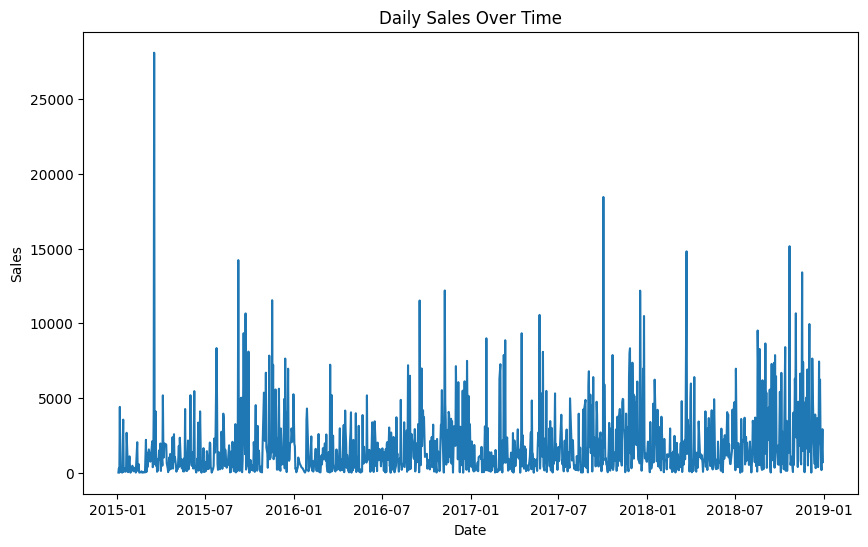

In [11]:
# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(sales_data['ds'], sales_data['y'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.show()



In [12]:
# Initialize the Prophet model
model = Prophet()



In [13]:
# Fit the model
model.fit(sales_data)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/hjitozb8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/3hv2i_pu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59245', 'data', 'file=/tmp/tmpstsrhcg1/hjitozb8.json', 'init=/tmp/tmpstsrhcg1/3hv2i_pu.json', 'output', 'file=/tmp/tmpstsrhcg1/prophet_modelpdmot2u_/prophet_model-20240605163138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
# Create a dataframe to hold predictions
future = model.make_future_dataframe(periods=365)



In [15]:
# Make predictions
forecast = model.predict(future)



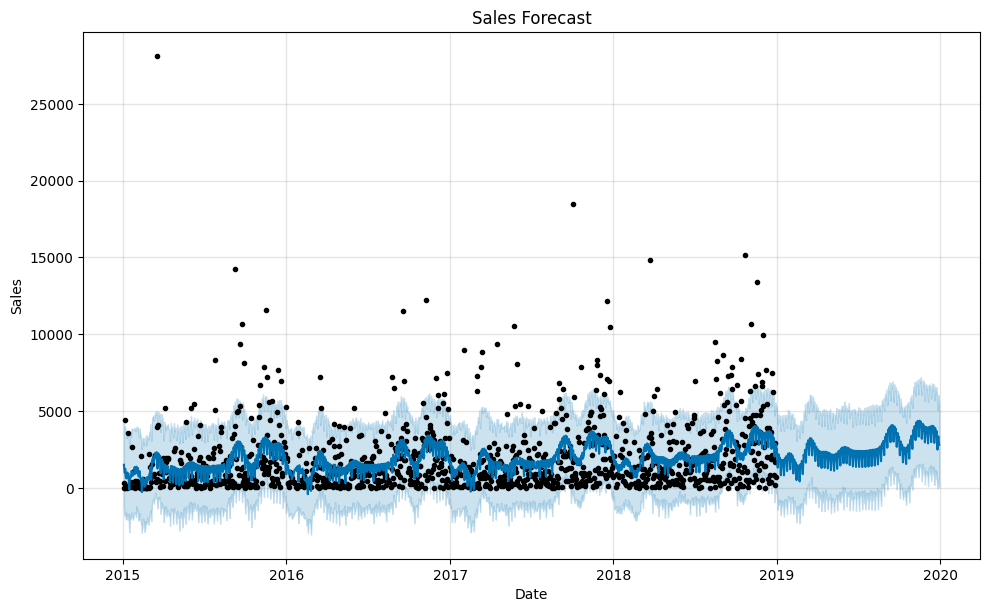

In [16]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



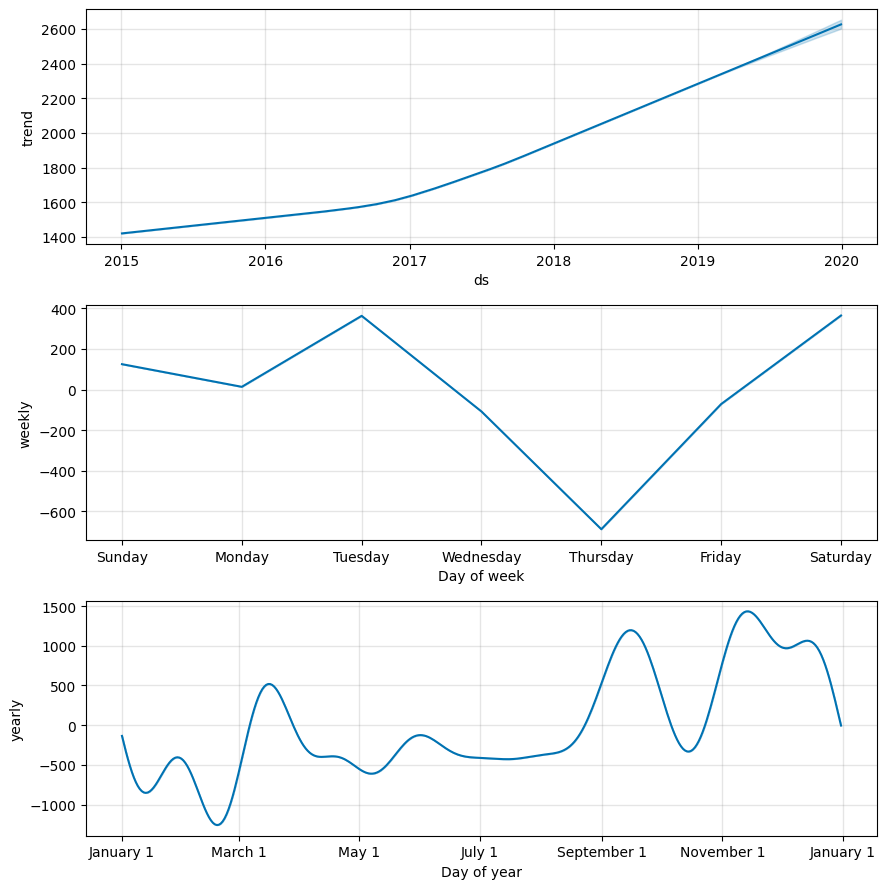

INFO:prophet:Making 3 forecasts with cutoffs between 2017-01-04 00:00:00 and 2017-12-30 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/7z_r4rk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/03_p_8ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33532', 'data', 'file=/tmp/tmpstsrhcg1/7z_r4rk1.json', 'init=/tmp/tmpstsrhcg1/03_p_8ty.json', 'output', 'file=/tmp/tmpstsrhcg1/prophet_modeldtuwf_iw/prophet_model-20240605163144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/sg3rcsm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/06r5bk4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon           mse         rmse          mae      mape     mdape  \
0 41 days  2.565973e+06  1601.865477  1133.952051  3.553283  0.738279   
1 42 days  2.556530e+06  1598.915167  1131.331669  3.571752  0.734838   
2 43 days  2.564971e+06  1601.552568  1135.883969  3.464952  0.734838   
3 44 days  2.552652e+06  1597.702009  1137.149559  3.545252  0.738279   
4 45 days  2.483319e+06  1575.855137  1117.401406  4.301340  0.738279   

      smape  coverage  
0  0.918574  0.936842  
1  0.920991  0.936842  
2  0.925075  0.936842  
3  0.933457  0.940351  
4  0.937613  0.947368  


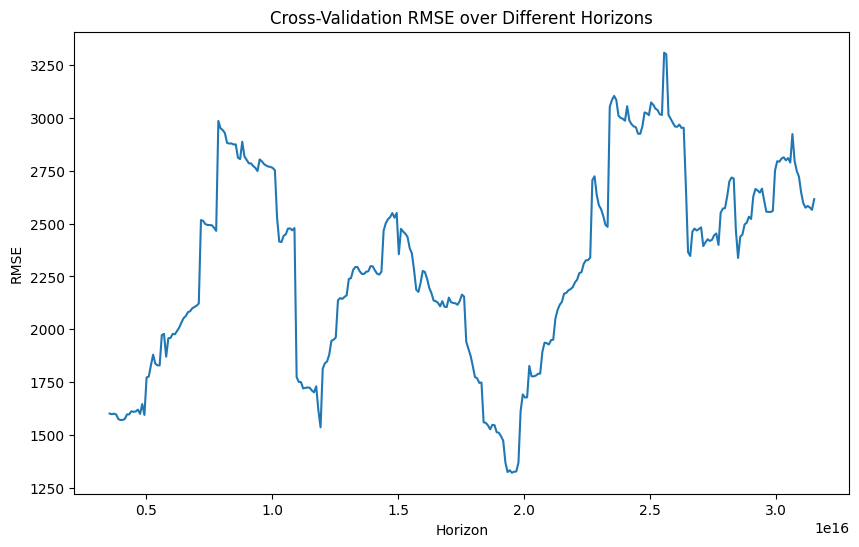

     horizon         rmse      mape          mae
0    41 days  1601.865477  3.553283  1133.952051
1    42 days  1598.915167  3.571752  1131.331669
2    43 days  1601.552568  3.464952  1135.883969
3    44 days  1597.702009  3.545252  1137.149559
4    45 days  1575.855137  4.301340  1117.401406
..       ...          ...       ...          ...
320 361 days  2575.125365  5.497082  1936.723864
321 362 days  2583.148056  5.034304  1944.117195
322 363 days  2576.329853  5.014204  1930.056381
323 364 days  2564.985430  5.013506  1902.205552
324 365 days  2615.351749  5.020365  1950.268527

[325 rows x 4 columns]


In [17]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate the model using cross-validation
# Here we set the initial period, the period for the cutoff, and the horizon for prediction
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

print(df_p.head())

# Plot the cross-validation performance metrics
plt.figure(figsize=(10, 6))
plt.plot(df_p['horizon'], df_p['rmse'])
plt.xlabel('Horizon')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE over Different Horizons')
plt.show()

# Display performance metrics
print(df_p[['horizon', 'rmse', 'mape', 'mae']])

In [18]:
# Evaluate the model using cross-validation
# Here we set the initial period, the period for the cutoff, and the horizon for prediction
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)

print(df_p.head())



INFO:prophet:Making 3 forecasts with cutoffs between 2017-01-04 00:00:00 and 2017-12-30 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/us3elbpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/dmd6ol2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31821', 'data', 'file=/tmp/tmpstsrhcg1/us3elbpp.json', 'init=/tmp/tmpstsrhcg1/dmd6ol2h.json', 'output', 'file=/tmp/tmpstsrhcg1/prophet_model_on_g2pe/prophet_model-20240605163147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:31:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/g5_gtwbx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpstsrhcg1/o0092gcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon           mse         rmse          mae      mape     mdape  \
0 41 days  2.565973e+06  1601.865477  1133.952051  3.553283  0.738279   
1 42 days  2.556530e+06  1598.915167  1131.331669  3.571752  0.734838   
2 43 days  2.564971e+06  1601.552568  1135.883969  3.464952  0.734838   
3 44 days  2.552652e+06  1597.702009  1137.149559  3.545252  0.738279   
4 45 days  2.483319e+06  1575.855137  1117.401406  4.301340  0.738279   

      smape  coverage  
0  0.918574  0.936842  
1  0.920991  0.936842  
2  0.925075  0.936842  
3  0.933457  0.940351  
4  0.937613  0.947368  


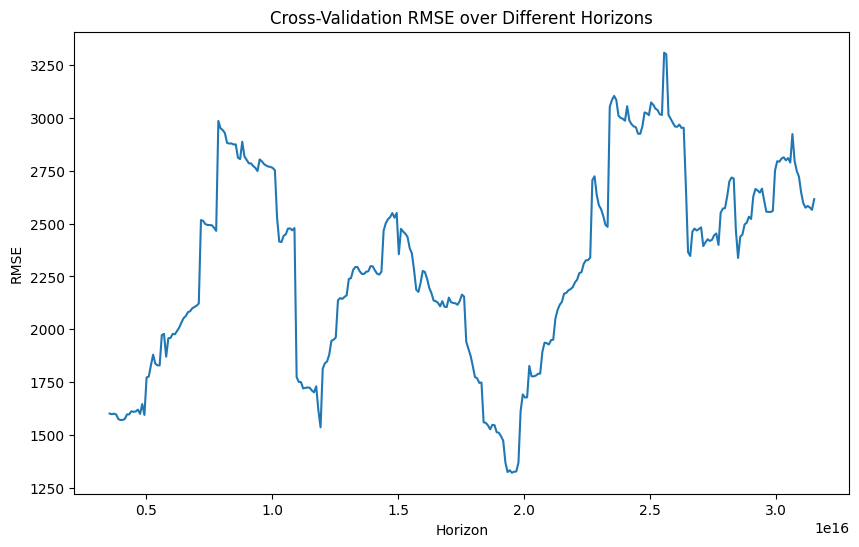

In [19]:
# Plot the cross-validation performance metrics
plt.figure(figsize=(10, 6))
plt.plot(df_p['horizon'], df_p['rmse'])
plt.xlabel('Horizon')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE over Different Horizons')
plt.show()



In [20]:
# Display performance metrics
print(df_p[['horizon', 'rmse', 'mape', 'mae']])

     horizon         rmse      mape          mae
0    41 days  1601.865477  3.553283  1133.952051
1    42 days  1598.915167  3.571752  1131.331669
2    43 days  1601.552568  3.464952  1135.883969
3    44 days  1597.702009  3.545252  1137.149559
4    45 days  1575.855137  4.301340  1117.401406
..       ...          ...       ...          ...
320 361 days  2575.125365  5.497082  1936.723864
321 362 days  2583.148056  5.034304  1944.117195
322 363 days  2576.329853  5.014204  1930.056381
323 364 days  2564.985430  5.013506  1902.205552
324 365 days  2615.351749  5.020365  1950.268527

[325 rows x 4 columns]
